In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import joblib
from sklearn.svm import SVC
from sklearn import metrics
import time
#import pyscreenshot as ImageGrab
from PIL import Image as im

In [ ]:
from google.colab import drive
data=drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
typed=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/typedCSV.csv')
typed2=typed

# Understanding the data

In [ ]:
typed

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,0,255,255,255,255,255,255,255,255,253,...,250,255,255,251,255,255,255,255,255,255
1,0,255,255,255,255,255,255,255,255,255,...,254,255,255,255,249,253,255,255,255,255
2,0,255,255,255,255,255,255,255,255,254,...,255,255,255,255,255,255,255,255,255,255
3,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,0,255,253,255,253,251,255,254,255,255,...,255,255,253,253,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62987,61,255,252,254,255,253,255,255,253,255,...,246,255,252,255,252,255,255,255,255,255
62988,61,255,254,254,254,253,255,252,254,255,...,252,255,254,250,255,255,255,255,255,255
62989,61,255,252,255,255,254,255,254,255,254,...,252,255,254,250,255,255,255,255,255,255
62990,61,252,254,255,255,255,254,255,248,255,...,245,255,251,255,253,255,255,255,255,255


## **Columns**
###There are over 62992 rows and 785 columns

###The columns represent each pixel value which indicates that there are over 785 pixels in each image.

###Each row is a 1-D array of the image which has to be coverted into an 2-D array of size (24,24)

## Labels
### Each label represents a character. 0-9 represent numbers from '0-9'
### 9-35 represent capital letter from A-Z and 36-61 represent lower case letter from a-z

In [ ]:
values={0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',
        27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35:'Z',36:'a',37:'b',38:'c',39:'d',40:'e',41:'f',42:'g',43:'h',44:'i',45:'j',46:'k',
        47:'l',48:'m',49:'n',50:'o',51:'p',52:'q',53:'r',54:'s',55:'t',56:'u',57:'v',58:'w',59:'x',60:'y',61:'z'}

<BarContainer object of 62 artists>

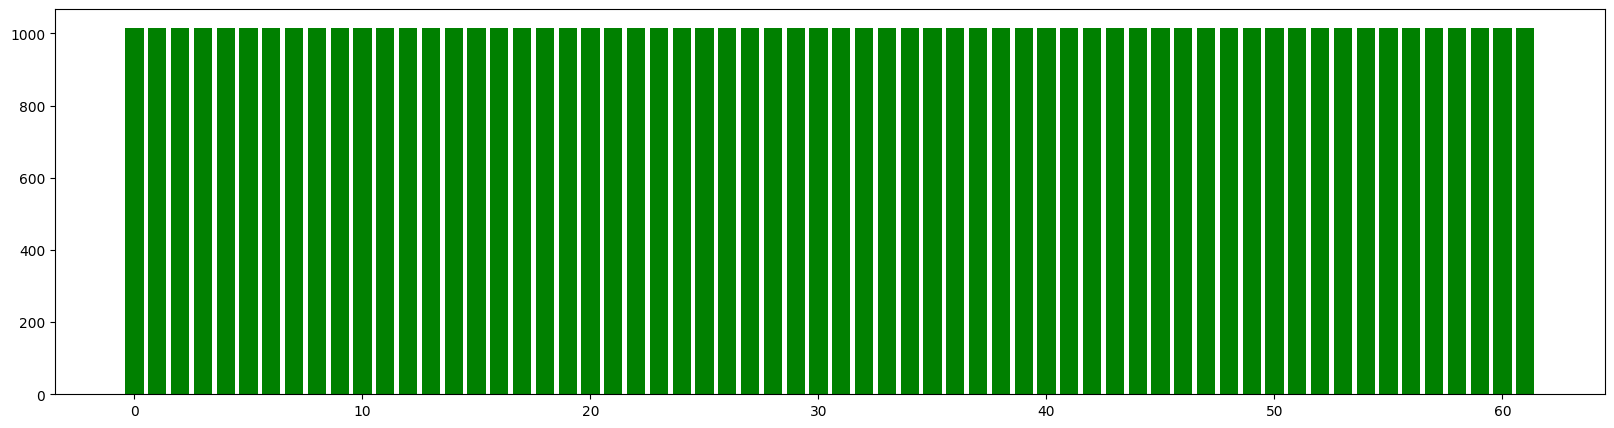

In [ ]:
fig = plt.figure(figsize = (20, 5))
plt.bar(values.keys(),typed2['label'].value_counts(),color='g')

#We are printing the array values of row 629887 where the row contains pixel values.


In [ ]:
array=np.array(typed.iloc[62987:62988,1:])
array

array([[255, 252, 254, 255, 253, 255, 255, 253, 255, 255, 255, 255, 255,
        255, 255, 255, 254, 255, 255, 251, 255, 255, 254, 255, 254, 253,
        254, 255, 252, 255, 255, 254, 249, 254, 252, 255, 254, 254, 254,
        254, 254, 254, 254, 254, 253, 255, 255, 255, 255, 253, 253, 253,
        255, 255, 255, 255, 249, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 251, 254, 253, 255,
        255, 255, 251, 255, 255, 254, 255, 255, 253, 255, 255, 250, 254,
        189, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 126, 132,
        128, 129, 128, 123, 243, 251, 255, 255, 255, 251, 254, 255, 254,
        250, 255,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2,   0,   0,   0,  20, 243, 251, 255, 255, 255, 252, 255,
        254, 255, 255, 255,  35,   0,   0,   0,   0,   0,   0,   0,   0,
          4,   1,   0,   0,   0,   1,   1,  63, 251, 255, 255, 254, 255,
        255, 255, 254, 253, 255, 227,  11,   0,   0

# We reshape the array as mentioned above with the reason

In [ ]:
array=array.reshape((28,28))
array

array([[255, 252, 254, 255, 253, 255, 255, 253, 255, 255, 255, 255, 255,
        255, 255, 255, 254, 255, 255, 251, 255, 255, 254, 255, 254, 253,
        254, 255],
       [252, 255, 255, 254, 249, 254, 252, 255, 254, 254, 254, 254, 254,
        254, 254, 254, 253, 255, 255, 255, 255, 253, 253, 253, 255, 255,
        255, 255],
       [249, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 251, 254, 253, 255, 255, 255, 251, 255,
        255, 254],
       [255, 255, 253, 255, 255, 250, 254, 189, 128, 128, 128, 128, 128,
        128, 128, 128, 129, 129, 126, 132, 128, 129, 128, 123, 243, 251,
        255, 255],
       [255, 251, 254, 255, 254, 250, 255,  96,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2,   0,   0,   0,  20, 243, 251,
        255, 255],
       [255, 252, 255, 254, 255, 255, 255,  35,   0,   0,   0,   0,   0,
          0,   0,   0,   4,   1,   0,   0,   0,   1,   1,  63, 251, 255,
        255, 254],
       [25

### im.fromarray helps us convert the 2D array into an image

In [ ]:
data=im.fromarray(array.astype(np.uint8))

In [ ]:
data

  **We shuffle the data in order to get a better accuracy score**

In [ ]:
typed=shuffle(typed)

**Dividing the features into independent and dependent**

In [ ]:
X=typed.drop('label',axis=1)
Y=typed["label"]

In [ ]:
print(X)
print(Y)

       pixel 0  pixel 1  pixel 2  pixel 3  pixel 4  pixel 5  pixel 6  pixel 7  \
49490      255      255      255      255      255      255      255      255   
8916       255      255      255      255      255      255      255      255   
17329      253      255      245      255      255      252      252      254   
61026      255      255      255      255      255      255      255      255   
3005       254      250      255      255      253      253      253      253   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17119      255      255      255      255      255      255      255      255   
19033      255      255      254      255      255      255      255      255   
16230      255      255      255      255      255      255      255      255   
62586      255      255      255      255      255      255      255      255   
38907      252      255      255      255      254      255      255      255   

       pixel 8  pixel 9  ..

# Plotting various characters using matplotlib to understand how images are actually stored

16


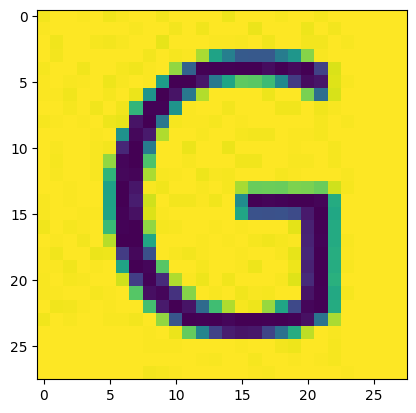

In [ ]:
idx=16876
img=X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

17


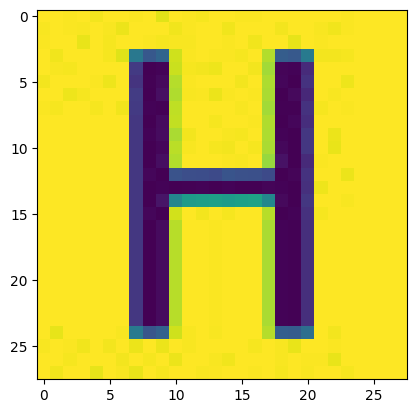

In [ ]:
idx=17876
img=X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

46


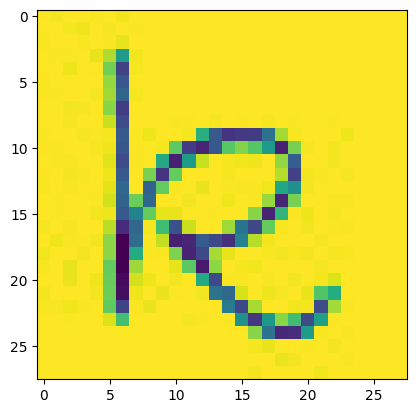

In [ ]:
idx=46876
img=X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

60


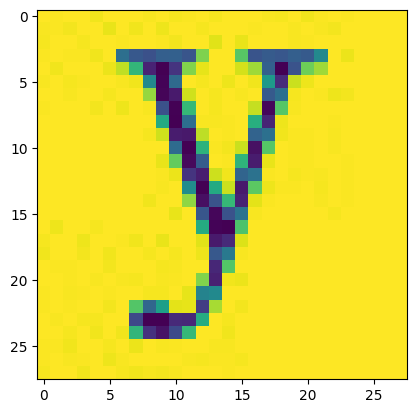

In [ ]:
idx=61876
img=X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

6


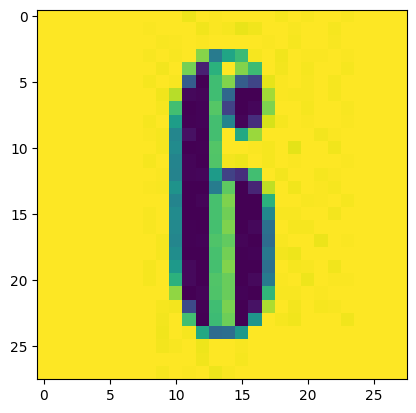

In [ ]:
idx=6876
img=X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

# splitting our data into training and testing parts

### using SVM algorithm for recognition of characters as SVM works relatively well when there is a clear margin of separation between classes.
### and SVM is relatively memory efficient

In [ ]:
trainX=X.iloc[:53393,:]
trainY=Y.iloc[:53393]
testX=X.iloc[53393:,:]
testY=Y.iloc[53393:]
classifier=SVC(random_state=6)

In [ ]:
classifier.fit(trainX,trainY)

SVC(random_state=6)

# we have used the joblib module to save our model for easy accesessibilty in the future

In [ ]:
joblib.dump(classifier,'/content/drive/MyDrive/Colab Notebooks/model/character_recognizer')

['/content/drive/MyDrive/Colab Notebooks/model/character_recognizer']

# Predicting all the test cases

In [ ]:
prediction=classifier.predict(testX)

# The accuracy is 0.86 which means 86 out of 100 test cases are being predicted  right

In [ ]:
print("Accuracy= ",metrics.accuracy_score(prediction,testY))

Accuracy=  0.8622773205542243


# resetting the indexes as we shuffled it for further predictiong

In [ ]:
sorted=typed.reset_index()

# Creating a method for our predictions

In [ ]:
def predicting(val):
  model=joblib.load('/content/drive/MyDrive/Colab Notebooks/model/character_recognizer')
  prediction1=model.predict(np.array(val).reshape(1,-1))
  if prediction1[0] in values:
    print(prediction1,':',values[prediction1[0]])
    plt.imshow(np.array(val).reshape(28,28))
    plt.show()

In [ ]:
sorted=sorted.drop('index',axis=1)

In [ ]:
sorted

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,48,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,8,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,17,253,255,245,255,255,252,252,254,255,...,253,255,245,255,255,254,249,255,255,255
3,60,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,2,254,250,255,255,253,253,253,253,254,...,253,251,253,255,253,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62987,16,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
62988,18,255,255,254,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
62989,15,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
62990,61,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


# Predictiong the last 10 values from our test case and plotting for verification

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[50] : o


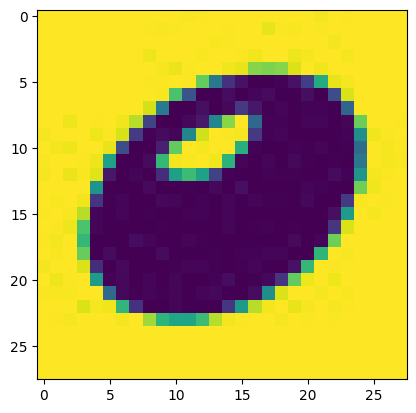

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[54] : s


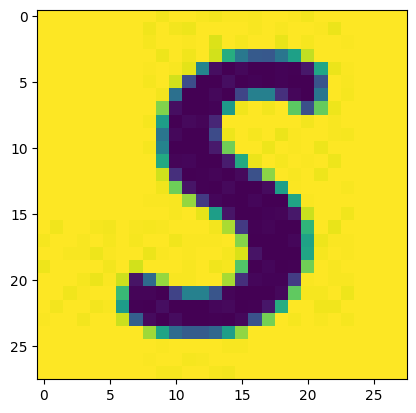

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[16] : G


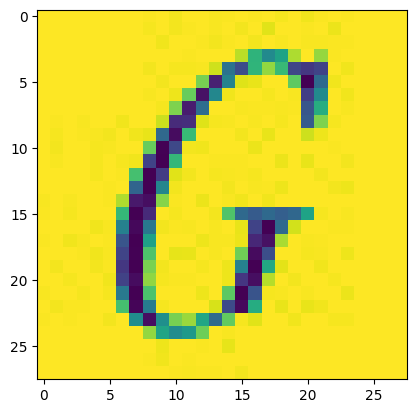

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[11] : B


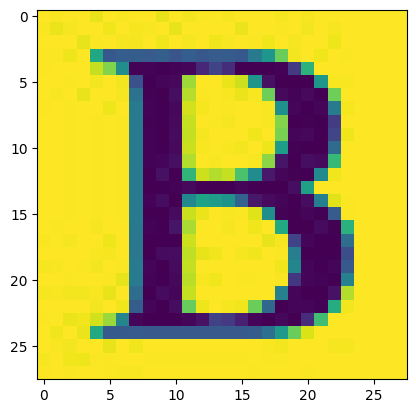

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[7] : 7


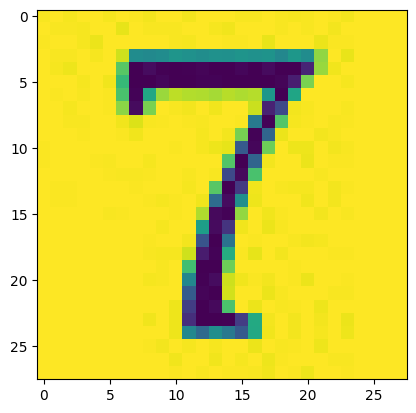

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[13] : D


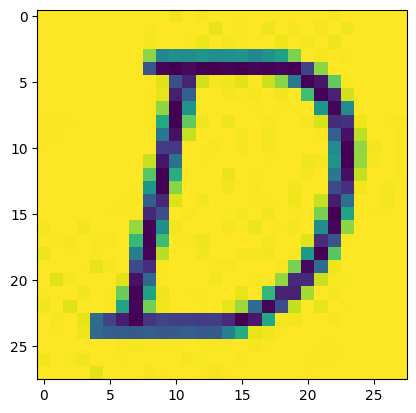

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[16] : G


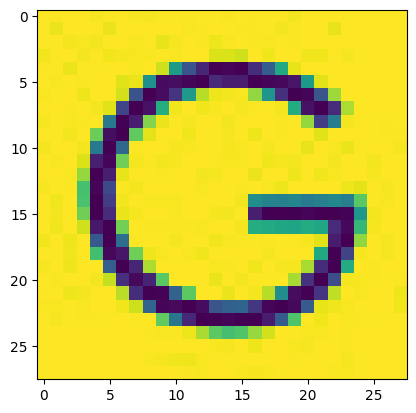

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[16] : G


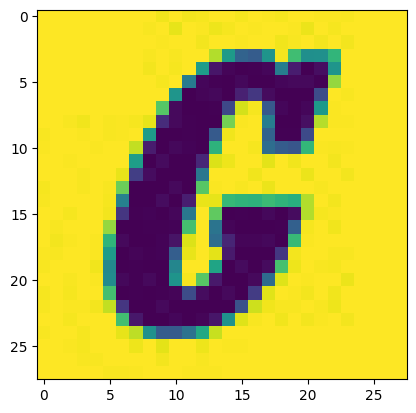

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[18] : I


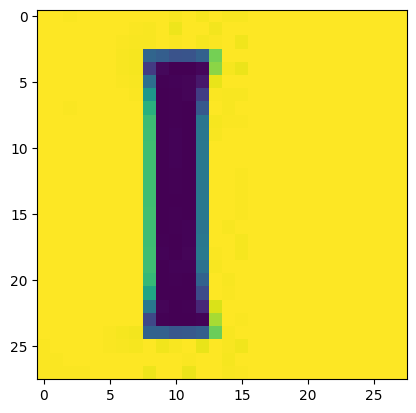

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[15] : F


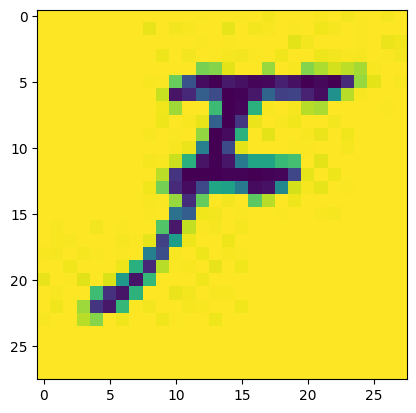

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[61] : z


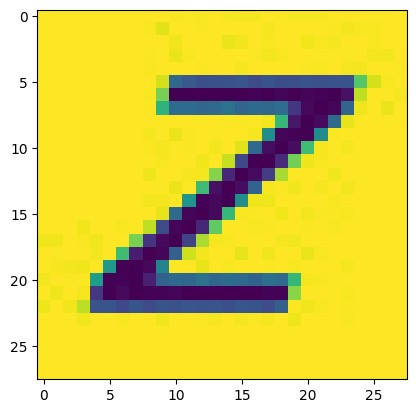

In [ ]:
for i in range(62980,62991):
  x1=sorted.iloc[i][1:]
  predicting(x1)


In [ ]:
sorted.tail(10)

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
62982,16,255,255,255,255,255,255,255,255,254,...,255,255,255,255,255,255,255,255,255,255
62983,11,255,253,254,255,247,255,253,255,255,...,255,255,254,255,255,255,255,255,255,255
62984,7,253,255,252,255,255,252,255,254,251,...,255,254,249,255,255,254,255,255,255,255
62985,13,255,255,255,255,255,255,255,255,255,...,255,255,254,255,255,255,255,255,255,255
62986,16,255,254,255,255,252,254,255,253,252,...,255,255,255,255,253,253,255,255,255,255
62987,16,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
62988,18,255,255,254,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
62989,15,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
62990,61,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
62991,38,252,255,255,255,254,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
